In [1]:
import hoomd
import hoomd.md
import ex_render
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
hoomd.context.initialize('--mode=cpu');
system = hoomd.init.create_lattice(unitcell=hoomd.lattice.sq(a=1.1), n=10);
nl = hoomd.md.nlist.cell();
lj = hoomd.md.pair.lj(r_cut=3.0, nlist=nl);
lj.pair_coeff.set('A', 'A', epsilon=1.0, sigma=1.0);
hoomd.md.integrate.mode_standard(dt=0.005);
langevin = hoomd.md.integrate.langevin(group=hoomd.group.all(), kT=1.0, seed=2);
hoomd.run(300, quiet=True);
d = hoomd.dump.gsd("trajectory.gsd", period=200, group=hoomd.group.all(), overwrite=True);
log1 = hoomd.analyze.log(filename="log.log",
                         quantities=['potential_energy'],
                         period=10,
                         overwrite=True);
langevin.disable();

HOOMD-blue v2.1.8 CUDA (7.5) DOUBLE HPMC_MIXED MPI SSE SSE2 SSE3 
Compiled: 07/21/2017
Copyright 2009-2016 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
HOOMD-blue is running on the CPU
notice(2): Group "all" created containing 100 particles
notice(2): integrate.langevin/bd is using specified gamma values
notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 100
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in t

# Energy minimization

HOOMD can perform energy minimization using the FIRE algorithm. When performing energy minimization, the system does not sample a thermodynamic ensemble. Each time step moves the system toward a local energy minimum in the potential energy landscape. There are many options that control the optimizer, but they all come with reasonable defaults.

[ex_render](ex_render.py) is a helper script that builds animated gifs from trajectory files and system snapshots. It is part of the [hoomd-examples](https://github.com/glotzerlab/hoomd-examples) repository and designed only to render these examples.

In [3]:
fire = hoomd.md.integrate.mode_minimize_fire(group=hoomd.group.all(), dt=0.005);

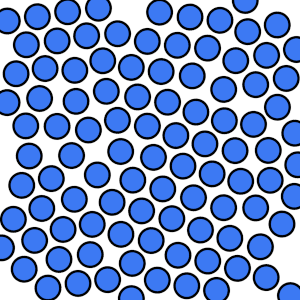

In [4]:
while not(fire.has_converged()):
   hoomd.run(100, quiet=True);
ex_render.display_movie(ex_render.render_disk_frame, 'trajectory.gsd')

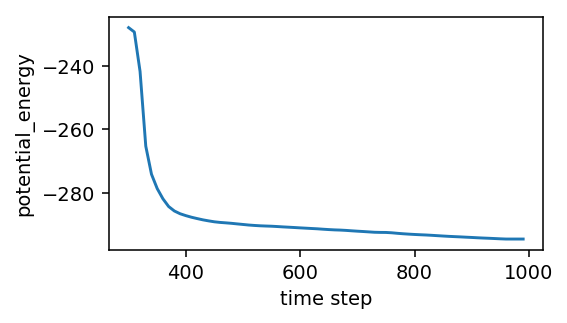

In [5]:
pyplot.figure(figsize=(4,2.2), dpi=140);
data = numpy.genfromtxt(fname='log.log', skip_header=True);
pyplot.plot(data[:,0], data[:,1]);
pyplot.xlabel('time step');
pyplot.ylabel('potential_energy');